<a href="https://colab.research.google.com/github/jadercaro/OnTimeAI/blob/main/onTimeAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving airlines_delay.csv to airlines_delay.csv


In [ ]:
airlines_delay=pd.read_csv("airlines_delay.csv")

##Ver la información general de los datos en la Base de Datos

In [ ]:
airlines_delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  object 
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  object 
 7   Class        539382 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 32.9+ MB


In [ ]:
airlines_delay.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [ ]:
airlines_delay.shape

(539382, 8)

##Convertir la variable flight, DayOfWeek a tipo objeto

In [ ]:
airlines_delay["Flight"] = airlines_delay["Flight"].astype(object)
airlines_delay["DayOfWeek"] = airlines_delay["DayOfWeek"].astype(object)
airlines_delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  object 
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  object 
 7   Class        539382 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 32.9+ MB


##Analizar la recurrencia de la variable Flight en la Base de Datos

In [ ]:
#Frencuencia de la variable Flight
print(airlines_delay['Flight'].value_counts())

16.0      420
5.0       407
9.0       401
8.0       396
62.0      364
         ... 
7814.0      1
4544.0      1
5131.0      1
6969.0      1
3518.0      1
Name: Flight, Length: 6585, dtype: int64


<Axes: xlabel='Flight', ylabel='count'>

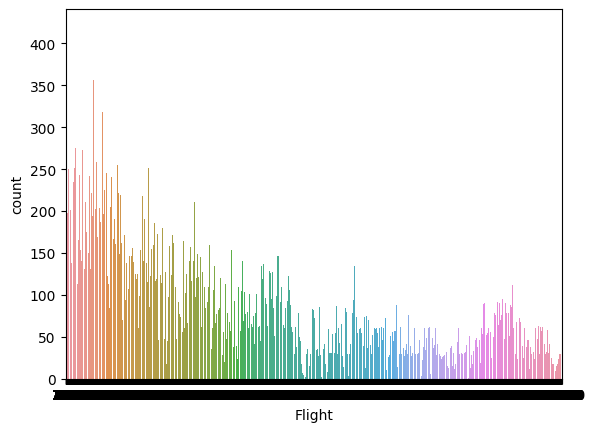

In [ ]:
#Gráfico de frencuencias de la variable Flight
sns.countplot(x=airlines_delay['Flight'])

#Análisis de variables cuantitativas

In [ ]:
#Matriz de Correlación
numerical_values = airlines_delay[['Time','Length']]
matriz_cor = numerical_values.corr()
display(matriz_cor)

,Time,Length
Time,1.00000,-0.02061
Length,-0.02061,1.00000


In [ ]:
#Resumen estadístico
numerical_values.describe()

,Time,Length
count,539382.000000,539382.000000
mean,802.728161,132.202104
std,278.045546,70.117045
min,10.000000,0.000000
25%,565.000000,81.000000
50%,795.000000,115.000000
75%,1035.000000,162.000000
max,1439.000000,655.000000


##Análisis de variables categóricas

<Axes: xlabel='Flight', ylabel='count'>

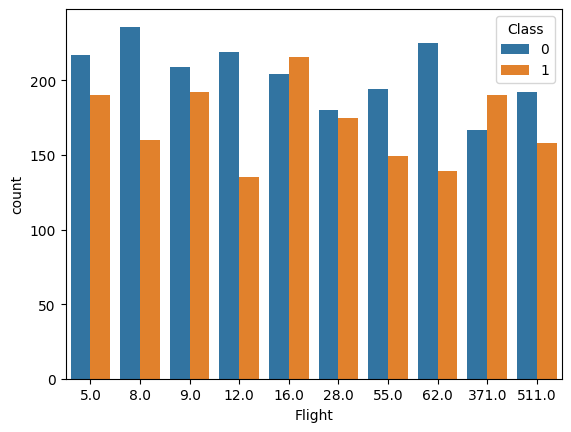

In [ ]:
#Gráfico de frecuencia de los vuelos que más se repiten (frecuencia mayor a 340)
frecuencia_flg = airlines_delay['Flight'].value_counts()
categorias_flg = frecuencia_flg[frecuencia_flg > 340].index.tolist()
sns.countplot(x='Flight', hue='Class', data=airlines_delay[airlines_delay['Flight'].isin(categorias_flg)])


# ANALISÍS DE FRECUENCIAS

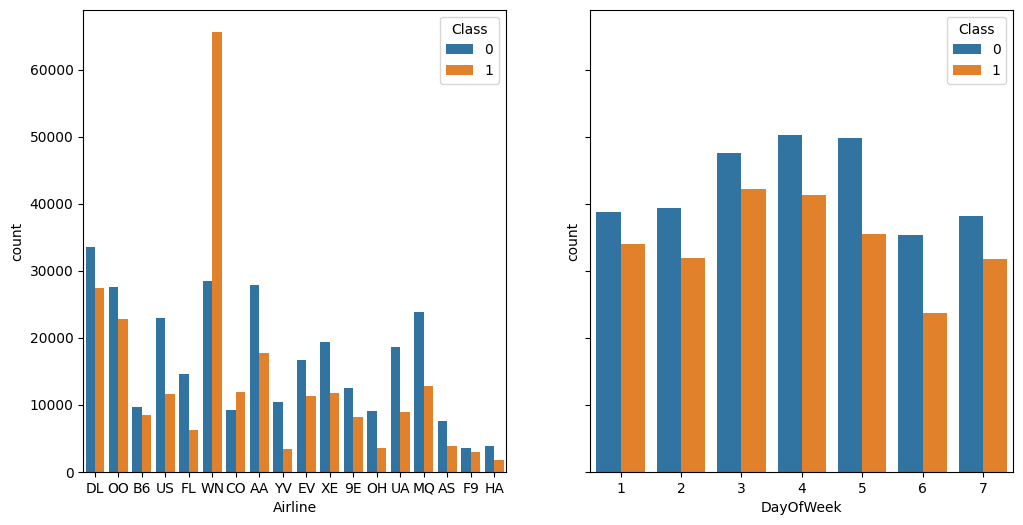

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Análisis de frecuencia
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 6), sharey=True)
sns.countplot(x='Airline', hue='Class', data=airlines_delay, ax=axs[0])
sns.countplot(x='DayOfWeek', hue='Class', data=airlines_delay, ax=axs[1])
plt.show()


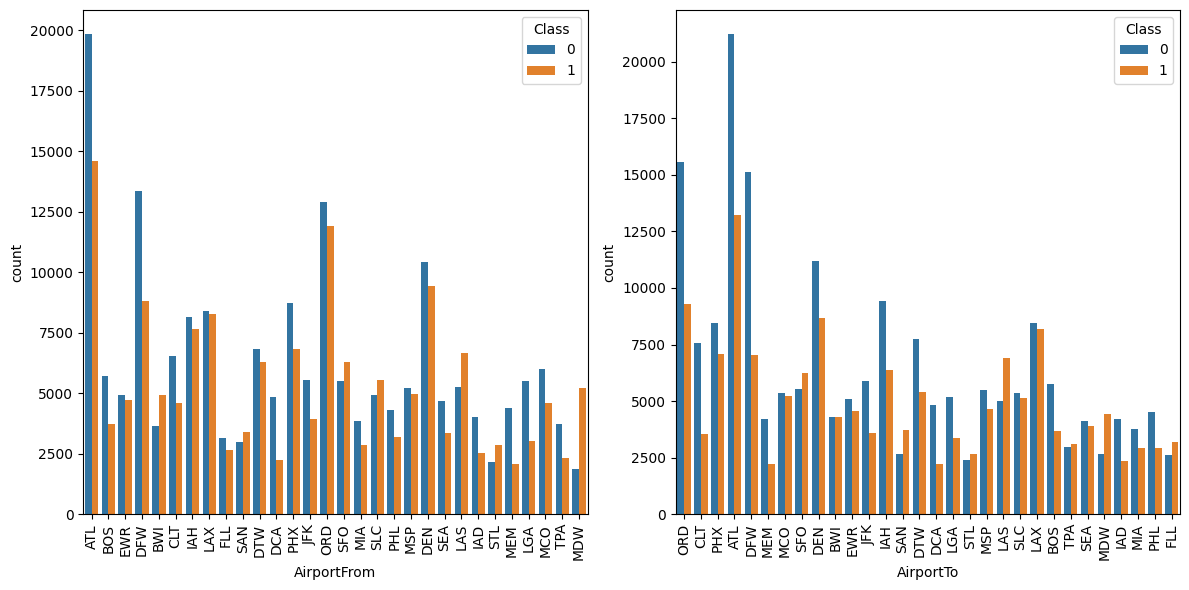

In [ ]:
# Frecuencia de AirportFrom
frecuencia_af = airlines_delay['AirportFrom'].value_counts()
categorias_af = frecuencia_af[frecuencia_af > 5000].index.tolist()

# Frecuencia de AirportTo
frecuencia_at = airlines_delay['AirportTo'].value_counts()
categorias_at = frecuencia_at[frecuencia_at > 5000].index.tolist()

# Graficar sólo las categorías con frecuencia > 5000
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))

sns.countplot(x='AirportFrom', hue='Class', data=airlines_delay[airlines_delay['AirportFrom'].isin(categorias_af)], ax=axs[0])
axs[0].tick_params(axis='x', rotation=90)
sns.countplot(x='AirportTo', hue='Class', data=airlines_delay[airlines_delay['AirportTo'].isin(categorias_at)], ax=axs[1])
axs[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Cargar los datos desde el archivo CSV
datos = pd.read_csv("airlines_delay.csv")

# Agrupar las categorías de AirportFrom y AirportTo por ciudad
datos["AirportFrom"] = datos["AirportFrom"].str.split().str[-1]
datos["AirportTo"] = datos["AirportTo"].str.split().str[-1]

# Calcular la tabla de contingencia
tabla_contingencia = pd.crosstab(index=datos["Class"], columns=[datos["AirportFrom"], datos["AirportTo"]])

# Realizar el test de chi-cuadrado y obtener los p-values
chi2, pval, dof, expected = chi2_contingency(tabla_contingencia)

# Calcular la matriz de correlación phi
phi_matrix = np.sqrt(chi2 / (len(datos)*min(tabla_contingencia.shape)-1))

# Crear un dataframe para mostrar los resultados
resultados = pd.DataFrame({
    "chi2": chi2,
    "p-value": pval,
    "grados de libertad": dof,
    "phi": phi_matrix.flatten()
}, index=tabla_contingencia.columns).sort_values("p-value")

# Mostrar los resultados
print(resultados)

                               chi2  p-value  grados de libertad       phi
AirportFrom AirportTo                                                     
ABE         ATL        49672.544376      0.0                4189  0.214583
MSP         HNL        49672.544376      0.0                4189  0.214583
            IAD        49672.544376      0.0                4189  0.214583
            IAH        49672.544376      0.0                4189  0.214583
            ICT        49672.544376      0.0                4189  0.214583
...                             ...      ...                 ...       ...
EWR         GSO        49672.544376      0.0                4189  0.214583
            GSP        49672.544376      0.0                4189  0.214583
            HDN        49672.544376      0.0                4189  0.214583
            IAD        49672.544376      0.0                4189  0.214583
YUM         PHX        49672.544376      0.0                4189  0.214583

[4190 rows x 4 columns]


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Cargar los datos desde el archivo CSV
datos = pd.read_csv("airlines_delay.csv")
datos["DayOfWeek"] = datos["DayOfWeek"].astype(object)

# Convertir variables categóricas a tipo "category"
for column in datos.select_dtypes(include=["object"]).columns:
    datos[column] = datos[column].astype("category")


# Calcular la tabla de contingencia para cada variable categórica
resultados = pd.DataFrame(columns=["Variable", "chi2", "p-value", "grados de libertad", "phi"])
for column in datos.select_dtypes(include=["category"]).columns:
    tabla_contingencia = pd.crosstab(index=datos[column], columns=datos["Class"])
    chi2, pval, dof, expected = chi2_contingency(tabla_contingencia)
    phi_matrix = np.sqrt(chi2 / (len(datos)*min(tabla_contingencia.shape)-1))
    resultados = resultados.append({
        "Variable": column,
        "chi2": chi2,
        "p-value": pval,
        "grados de libertad": dof,
        "phi": phi_matrix
    }, ignore_index=True)

# Ordenar los resultados por p-value
resultados = resultados.sort_values("p-value")

# Mostrar los resultados
print(resultados)

      Variable          chi2        p-value grados de libertad       phi
0      Airline  38193.243961   0.000000e+00                 17  0.188161
1  AirportFrom  17463.744644   0.000000e+00                292  0.127235
2    AirportTo  15145.026397   0.000000e+00                292  0.118487
3    DayOfWeek   1178.019697  2.735034e-251                  6  0.033046


<ipython-input-17-8718be062507>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados = resultados.append({
<ipython-input-17-8718be062507>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados = resultados.append({
<ipython-input-17-8718be062507>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados = resultados.append({
<ipython-input-17-8718be062507>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados = resultados.append({


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Cargar los datos desde el archivo CSV
datos = pd.read_csv("airlines_delay.csv")

# Calcular la tabla de contingencia
tabla_contingencia = pd.crosstab(index=datos["Class"], columns=[datos["Airline"], datos["DayOfWeek"]])

# Realizar el test de chi-cuadrado y obtener los p-values
chi2, pval, dof, expected = chi2_contingency(tabla_contingencia)

# Calcular la matriz de correlación phi
phi_matrix = np.sqrt(chi2 / (len(datos)*min(tabla_contingencia.shape)-1))

# Crear un dataframe para mostrar los resultados
resultados = pd.DataFrame({
    "chi2": chi2,
    "p-value": pval,
    "grados de libertad": dof,
    "phi": phi_matrix.flatten()
}, index=tabla_contingencia.columns).sort_values("p-value")

# Mostrar los resultados
print(resultados)

                           chi2  p-value  grados de libertad       phi
Airline DayOfWeek                                                     
9E      1          40915.187775      0.0                 125  0.194751
UA      1          40915.187775      0.0                 125  0.194751
OO      7          40915.187775      0.0                 125  0.194751
        6          40915.187775      0.0                 125  0.194751
        5          40915.187775      0.0                 125  0.194751
...                         ...      ...                 ...       ...
DL      1          40915.187775      0.0                 125  0.194751
CO      7          40915.187775      0.0                 125  0.194751
        6          40915.187775      0.0                 125  0.194751
EV      5          40915.187775      0.0                 125  0.194751
YV      7          40915.187775      0.0                 125  0.194751

[126 rows x 4 columns]


In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Cargar los datos desde el archivo CSV
datos = pd.read_csv("airlines_delay.csv")

# Realizar el ANOVA para la variable Airline
airline_anova = f_oneway(
    datos[datos["Airline"] == "AA"]["Class"],
    datos[datos["Airline"] == "AS"]["Class"],
    datos[datos["Airline"] == "B6"]["Class"],
    datos[datos["Airline"] == "DL"]["Class"],
    datos[datos["Airline"] == "EV"]["Class"],
    datos[datos["Airline"] == "F9"]["Class"],
    datos[datos["Airline"] == "HA"]["Class"],
    datos[datos["Airline"] == "MQ"]["Class"],
    datos[datos["Airline"] == "NK"]["Class"],
    datos[datos["Airline"] == "OO"]["Class"],
    datos[datos["Airline"] == "UA"]["Class"],
    datos[datos["Airline"] == "US"]["Class"],
    datos[datos["Airline"] == "VX"]["Class"],
    datos[datos["Airline"] == "WN"]["Class"],
    datos[datos["Airline"] == "YV"]["Class"],
    datos[datos["Airline"] == "YX"]["Class"],
)

# Imprimir los resultados
print("ANOVA para Airline:")
print("F-value:", airline_anova.statistic)
print("p-value:", airline_anova.pvalue)

ANOVA para Airline:
F-value: nan
p-value: nan


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [ ]:
#Filtro para seleccionar las aerolíneas que llegaron a tiempo
airline_on_time = airlines_delay['Class']==0

In [ ]:
#Base de datos sólo con las aerolíneas que llegaron a tiempo
airlines_on_time = airlines_delay[airline_on_time]

In [ ]:
airlines_on_time.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


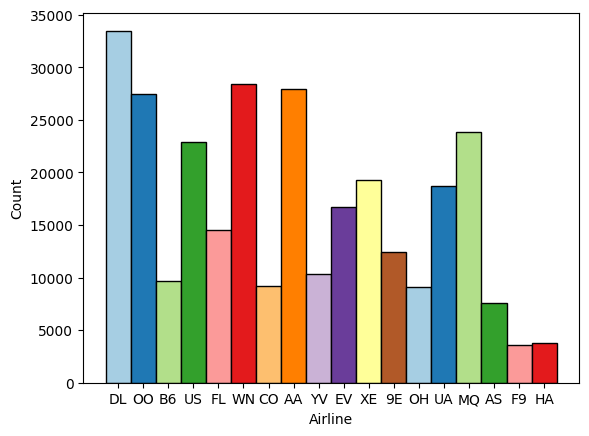

In [ ]:
#proporción de aerolíneas que llegaron a tiempo
cm = sns.color_palette("Paired", 18)
plot = sns.histplot(airlines_on_time['Airline'])
for bin_,i in zip(plot.patches,cm):
    bin_.set_facecolor(i)

##Codificación de las variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Usar LabelEncoder para codificar las variables categóricas.
encoder = LabelEncoder()
params = []
categorial_features = ["Flight", "Airline", "AirportFrom", "AirportTo"]

for f in categorial_features:
  encoder.fit(airlines_delay[f])
  airlines_delay[f] = encoder.transform(airlines_delay[f])
  params.append(np.array(encoder.classes_))

In [ ]:
#Orden en el que se realiza la codificación
for i in range(0, len(params)):
  print('Variable: ',categorial_features[i],params[i], len(params[i]), sep='\n')

Variable: 
Flight
[1.0 2.0 3.0 ... 7812.0 7813.0 7814.0]
6585
Variable: 
Airline
['9E' 'AA' 'AS' 'B6' 'CO' 'DL' 'EV' 'F9' 'FL' 'HA' 'MQ' 'OH' 'OO' 'UA'
 'US' 'WN' 'XE' 'YV']
18
Variable: 
AirportFrom
['ABE' 'ABI' 'ABQ' 'ABR' 'ABY' 'ACT' 'ACV' 'ACY' 'ADK' 'ADQ' 'AEX' 'AGS'
 'ALB' 'AMA' 'ANC' 'ASE' 'ATL' 'ATW' 'AUS' 'AVL' 'AVP' 'AZO' 'BDL' 'BET'
 'BFL' 'BGM' 'BGR' 'BHM' 'BIL' 'BIS' 'BKG' 'BLI' 'BMI' 'BNA' 'BOI' 'BOS'
 'BQK' 'BQN' 'BRO' 'BRW' 'BTM' 'BTR' 'BTV' 'BUF' 'BUR' 'BWI' 'BZN' 'CAE'
 'CAK' 'CDC' 'CDV' 'CEC' 'CHA' 'CHO' 'CHS' 'CIC' 'CID' 'CLD' 'CLE' 'CLL'
 'CLT' 'CMH' 'CMI' 'CMX' 'COD' 'COS' 'COU' 'CPR' 'CRP' 'CRW' 'CSG' 'CVG'
 'CWA' 'CYS' 'DAB' 'DAL' 'DAY' 'DBQ' 'DCA' 'DEN' 'DFW' 'DHN' 'DLH' 'DRO'
 'DSM' 'DTW' 'EAU' 'ECP' 'EGE' 'EKO' 'ELM' 'ELP' 'ERI' 'EUG' 'EVV' 'EWN'
 'EWR' 'EYW' 'FAI' 'FAR' 'FAT' 'FAY' 'FCA' 'FLG' 'FLL' 'FLO' 'FNT' 'FSD'
 'FSM' 'FWA' 'GCC' 'GEG' 'GFK' 'GGG' 'GJT' 'GNV' 'GPT' 'GRB' 'GRK' 'GRR'
 'GSO' 'GSP' 'GTF' 'GTR' 'GUC' 'GUM' 'HDN' 'HLN' 'HNL' 'HOU' 'HPN' 'HR

In [ ]:
#Caregorías por cada variable categórica
categorias = [len(cat) for cat in params]
result = {'Vaiable categórica':categorial_features, 'Categorías': categorias}
data = pd.DataFrame(result)
data

,Vaiable categórica,Categorías
0,Flight,6585
1,Airline,18
2,AirportFrom,293
3,AirportTo,293


In [ ]:
display(airlines_delay)

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2308,1296.0,141.0,5,16,129,1,0
1,6198,360.0,146.0,12,65,208,4,0
2,1243,1170.0,143.0,3,35,60,3,0
3,29,1410.0,344.0,14,203,217,6,0
4,561,692.0,98.0,8,32,16,4,0
...,...,...,...,...,...,...,...,...
539377,6223,530.0,72.0,12,111,252,5,1
539378,1260,560.0,115.0,15,153,79,4,1
539379,5004,827.0,74.0,6,47,16,2,1
539380,605,715.0,65.0,15,45,43,4,1


##Verificar la codificacion

In [ ]:
#Al aplicar la inversa se obtienen las categorías originales
encoder.inverse_transform((airlines_delay['AirportTo']))

array(['HOU', 'ORD', 'CLT', ..., 'ATL', 'BUF', 'DEN'], dtype=object)

In [ ]:
#Exportar el modelo con los datos codificados
airlines_delay.to_csv('datos_preparados',index=False)

### información mutua entre cada característica (mutual_info_classif)


In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

In [ ]:
database = pd.read_csv("datos_preparados")

In [ ]:
# la información mutua entre cada característica y la variable objetivo (class) en el problema de clasificación.
x = database[['Flight','Time','Length','Airline','AirportFrom','AirportTo','DayOfWeek']]
y = database['Class'] #se elimina la columna que referencia cada vuelo 
mutual = mutual_info_classif(x,y,discrete_features='auto', n_neighbors=3, copy=True, random_state=None)
result = {'feature': ['Flight','Time','Length','Airline','AirportFrom','AirportTo','DayOfWeek'], 'Mutual test': mutual}
data = pd.DataFrame(result)
 

In [ ]:
data

,feature,Mutual test
0,Flight,0.024058
1,Time,0.019984
2,Length,0.009375
3,Airline,0.043357
4,AirportFrom,0.016349
5,AirportTo,0.015118
6,DayOfWeek,0.010996


In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
#Prueba Chi2 para la selección de características
prueba_chi2, p_values = chi2(x,y)
p_values
result = {'Feature': ['Flight','Time','Length','Airline','AirportFrom','AirportTo','DayOfWeek'], 'Chi2': prueba_chi2,'p_value': p_values}
data = pd.DataFrame(result)
data

,Feature,Chi2,p_value
0,Flight,1.765767e+06,0.000000e+00
1,Time,1.175933e+06,0.000000e+00
2,Length,3.288238e+04,0.000000e+00
3,Airline,7.289812e+03,0.000000e+00
4,AirportFrom,8.034364e+03,0.000000e+00
5,AirportTo,5.426190e+04,0.000000e+00
6,DayOfWeek,3.453623e+02,4.336014e-77


#Separar datos de Test y Train

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datos_preparados to datos_preparados


In [ ]:
flight_delays = pd.read_csv("datos_preparados")

In [ ]:
#Datos
X = flight_delays[['Flight','Time','Length','Airline','AirportFrom','AirportTo','DayOfWeek']]
#Target
Y = flight_delays['Class']

#Separar datos de entrenamiento, validación y prueba
datos_train_val = X[:431505] #80% de los datos
Y_train_val = Y[:431505]

datos_test = X[431505:]
Y_test = Y[431505:]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(datos_train_val, Y_train_val, train_size=0.7)
                                #70% de los datos son para entrenar, 30% para validar


#H20 AUTOML

In [ ]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.2-py2.py3-none-any.whl size=177693439 sha256=38fc1d115c66e21a223b0c31cc66ed3c8642fe2acbbbbdc3ae6210f717001e78
  Stored in directory: /root/.cache/pip/wheels/b2/79/e3/842b81607eb31946ee24898cc9961b101e6486f988a5103967
Successfully built h2o


In [ ]:
import h2o

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmprapwbh2i
  JVM stdout: /tmp/tmprapwbh2i/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmprapwbh2i/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_unknownUser_g202di
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
from h2o.automl import H2OAutoML

In [ ]:
df = h2o.import_file("datos_preparados")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df.describe()

Rows:539382
Cols:8

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
type,int,int,int,int,int,int,int,int
mins,0.0,10.0,0.0,0.0,0.0,0.0,1.0,0.0
mean,2318.5263190095416,802.728161117725,132.2021035184717,9.334525438372074,144.11644066728306,144.14330289108568,3.9296658027149487,0.44544311823531374
maxs,6584.0,1439.0,655.0,17.0,292.0,292.0,7.0,1.0
sigma,1875.4732993278967,278.04554558647345,70.11704456829179,5.306372441024612,79.379801499149,79.35314258578425,1.9146655984563858,0.49701509497006485
zeros,289,0,4,20686,342,305,0,299118
missing,0,0,0,0,0,0,0,0
0,2308.0,1296.0,141.0,5.0,16.0,129.0,1.0,0.0
1,6198.0,360.0,146.0,12.0,65.0,208.0,4.0,0.0
2,1243.0,1170.0,143.0,3.0,35.0,60.0,3.0,0.0


In [ ]:
splits = df.split_frame(ratios=[0.7],seed=1)
train = splits[0]
test = splits[1]

In [ ]:
Y_h2o = "Class" 
X_h2o = df.columns 
X_h2o.remove(Y_h2o)
train[Y_h2o] = train[Y_h2o].asfactor()

In [ ]:
aml = H2OAutoML(max_models=40, seed= 1)
aml.train(x=X_h2o, y=Y_h2o, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████

In [ ]:
aml.leaderboard

NameError: ignored

In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
model_ids

In [ ]:
DRF= h2o.get_model([mid for mid in model_ids if "DRF" in mid][0])

In [ ]:
DRF.params

In [ ]:
DRF

In [ ]:
DRF.varimp_plot()

In [ ]:
DRF.confusion_matrix()

In [ ]:
XRT= h2o.get_model([mid for mid in model_ids if "XRT" in mid][0])
XRT

In [ ]:
XRT.varimp_plot()

In [ ]:
XGBoost= h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])
XGBoost

In [ ]:
XGBoost.varimp_plot()

In [ ]:
GBM= h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])
GBM

In [ ]:
GBM.varimp_plot()

In [ ]:
GLM= h2o.get_model([mid for mid in model_ids if "GLM" in mid][0])
GLM

In [ ]:
DRF.predict(test)

In [ ]:
DRF.model_performance(test)

In [ ]:
XRT.predict(test)

## Modelo de predicción Gaussiano

In [ ]:
#importamos las librerias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [ ]:
#leemos la base de datos previamente codificada con las variables de clasificacion
database = pd.read_csv("datos_preparados")

In [ ]:
#separamos la variable dependiente de las variables independientes
y=database.iloc[:,-1]
x=database.drop(columns="Class")

In [ ]:
#definidomos el conjunto de entrenamiento y el conjunto de pruebas
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Crear el modelo Naive Bayes
naive_bayes = GaussianNB()

In [ ]:
# Entrenar el modelo con los datos de entrenamiento
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = naive_bayes.predict(x_test)

# Métricas para determinar la precisión del Modelo Gaussiano


accuracy score



In [ ]:
#importamos la libreria
from sklearn.metrics import accuracy_score

In [ ]:
# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(precision * 100))

Precisión del modelo: 58.51%


Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_pred)
print("Matriz de confusión: ", confusion_mat)

Matriz de confusión:  [[67534 21940]
 [45203 27138]]


Precisión equilibrada

In [ ]:
from sklearn.metrics import balanced_accuracy_score

In [ ]:
balanced= balanced_accuracy_score(y_test,y_pred)
print("Precisión balanceada: {:.2f}%".format(balanced*100))

Precisión balanceada: 56.50%


AUC & ROC Curve

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc, roc_curve

In [ ]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [ ]:
# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

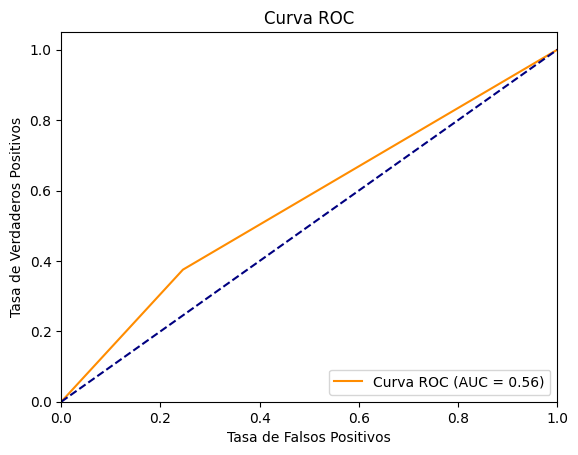

In [ ]:
# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

F1-Score

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1 = f1_score(y_test, y_pred)
print("El F1-score es: ",f1)

El F1-score es:  0.0010771249050611062


# Modelo de predicción Bernoulli

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
#creamos el modelo Bernoulli
naive_bayes = BernoulliNB()

In [ ]:
# Entrenar el modelo con los datos de entrenamiento
naive_bayes.fit(x_train, y_train)

BernoulliNB()

In [ ]:
#realizamos predicciones en el conjunto de pruebas
y_pred = naive_bayes.predict(x_test)

Precisión del modelo: 55.30%


# Métricas para determinar la precisión del Modelo Bernoulli

puntaje de precisión

In [ ]:
accurancy = accuracy_score(y_test,y_pred)
print('La precisión del modelo es: {:.2f}%'.format(accurancy*100))

La precisión del modelo es: 55.30%


Matriz de confusión

In [ ]:
# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_pred)
print("Matriz de confusión: ", confusion_mat)

Precisión equilibrada


In [ ]:
balanced= balanced_accuracy_score(y_test,y_pred)
print("Precisión balanceada: {:.2f}%".format(balanced*100))

AUC & ROC Curve

In [ ]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [ ]:
# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

In [ ]:
# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

F1-Score

In [ ]:
f1 = f1_score(y_test, y_pred)
print("El F1-score es: ",f1)